In [30]:
import pandas as pd

In [31]:
history = pd.read_csv('data/submission_history.csv', sep=';')
history

,model,filename,validation,private_score,public_score,status,date,description
0,bag(xgb),bagging_xgb_best_params_polyfeat,0.902510,0.88470,0.88290,Complete (after deadline),2d ago,NaN
1,bag(xgb),bagging_xgb_polyfeat,0.901570,0.88613,0.88451,Complete (after deadline),2d ago,NaN
2,voting(rfc xgb hgb abc),voting(rfc xgb hgb abc),0.892540,0.87934,0.87970,Complete (after deadline),2d ago,NaN
3,bag(xgb),bagging_xgb_polyfeat_imp_pred_pdp_pca_embs,0.894680,0.88343,0.88094,Complete,2d ago,NaN
4,stack(xgb hgb abc),stack(xgb hgb abc)_polyfeat_imp_pred_pdppca_embs,0.894220,0.87878,0.88190,Complete,2d ago,NaN
5,bag(xgb),bagging_xgb_polyfeat_imp_pred_pdp_pca_embs_,0.896200,0.87918,0.88083,Complete,2d ago,NaN
6,stack(xgb hgb abc),stack_optimized(xgb hgb abc)_polyfeat_imp_pred...,0.890820,0.87321,0.87389,Complete,2d ago,NaN
7,stack(xgb hgb abc),stack(xgb hgb abc)_polyfeat_imp_pred_pdppca_embs,0.892210,0.87997,0.88044,Complete,3d ago,NaN
8,xgb,xgb_hp_polyfeat_imp_pred_pdp_pca_embs,0.893360,0.87044,0.87144,Complete,3d ago,NaN
9,xgb,xgb_randomized_search_full_polyfeat_imp_pred_p...,0.897400,0.88100,0.88227,Complete,3d ago,NaN


In [36]:
history["ensemble"] = history["model"].str.contains("\(")

In [39]:
history.shape[0]

28

In [40]:
# add order of submission, index

history["order"] = (-history.index + history.shape[0] - 1).to_list()

In [25]:
# Max by private score

history.loc[history["private_score"].idxmax()]

model            avg(stack(bag(xgb) xgb hgb abc)->logreg voting...
filename                                       average_classifier_
validation                                                     NaN
private_score                                              0.88963
public_score                                               0.88677
status                                                    Complete
date                                                       1mo ago
description      VotingClassifier( estimators=[ ("rfc", rfc), (...
ensemble                                                      True
order                                                           -9
Name: 18, dtype: object

In [26]:
# Max by public score

history.loc[history["public_score"].idxmax()]

model            stack(xgb hgb abc)
filename         stack(xgb hgb abc)
validation                  0.89412
private_score               0.88681
public_score                0.88695
status                     Complete
date                        1mo ago
description                     NaN
ensemble                       True
order                            -5
Name: 14, dtype: object

In [27]:
# Max by validation score

history.loc[history["validation"].idxmax()]

model                                    bag(xgb)
filename         bagging_xgb_best_params_polyfeat
validation                                0.90251
private_score                              0.8847
public_score                               0.8829
status                  Complete (after deadline)
date                                       2d ago
description                                   NaN
ensemble                                     True
order                                           9
Name: 0, dtype: object

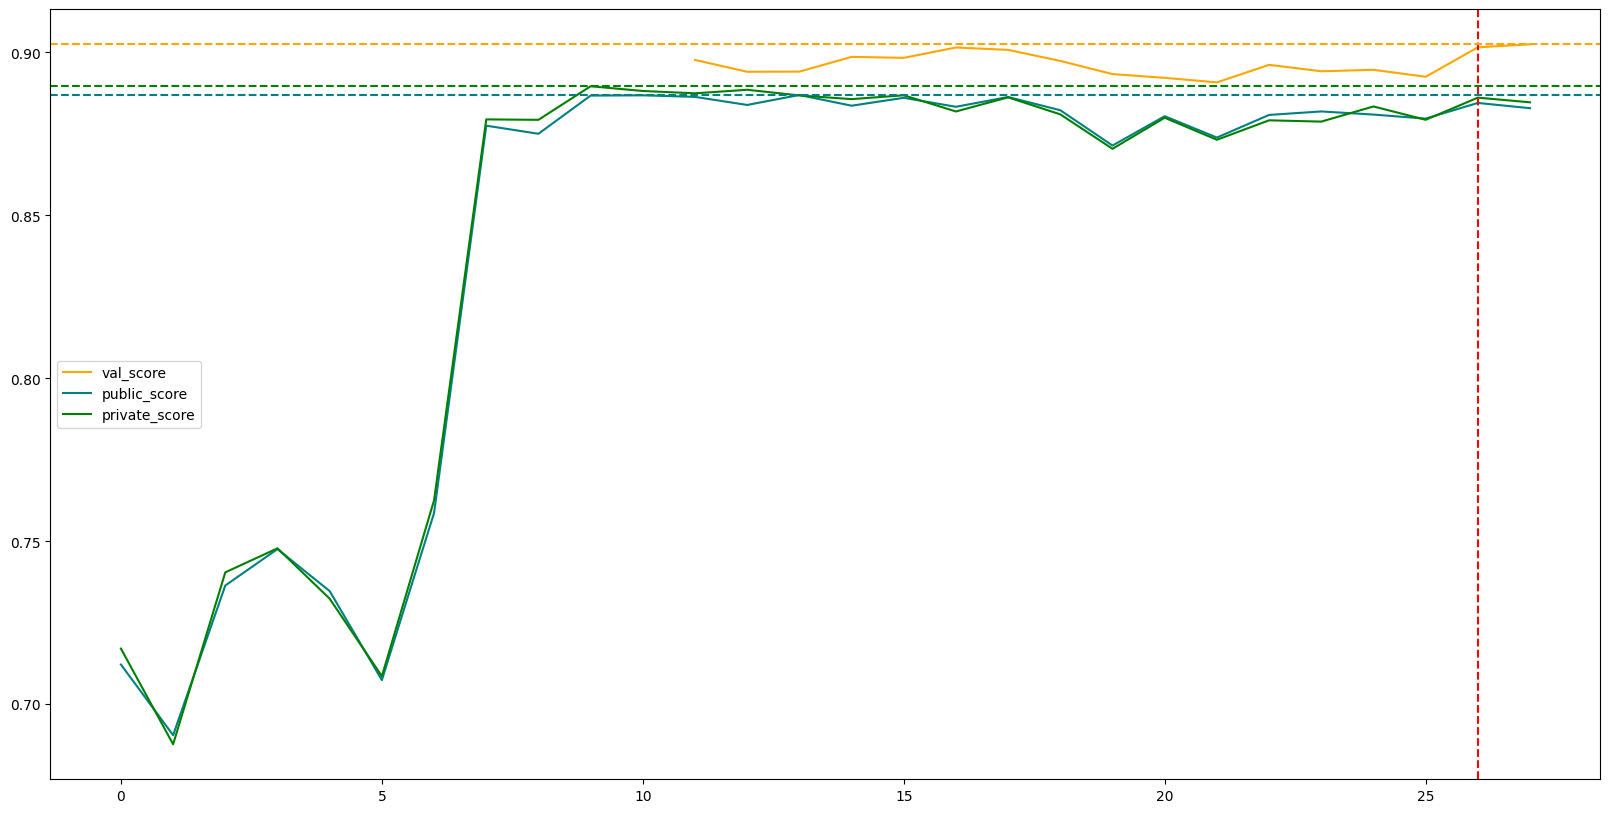

In [44]:
# Plot validation line vs public score line vs private score line

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(history["order"], history["validation"], label="val_score", color="orange")
ax.plot(history["order"], history["public_score"], label="public_score", color="teal")
ax.plot(history["order"], history["private_score"], label="private_score", color="green")

ax.legend()

# Add vertical line at (- history.index + 2)

ax.axvline(history.shape[0] - 2, color="red", linestyle="--")

# Add horizontal lines at max values

ax.axhline(history["validation"].max(), color="orange", linestyle="--")
ax.axhline(history["public_score"].max(), color="teal", linestyle="--")
ax.axhline(history["private_score"].max(), color="green", linestyle="--")

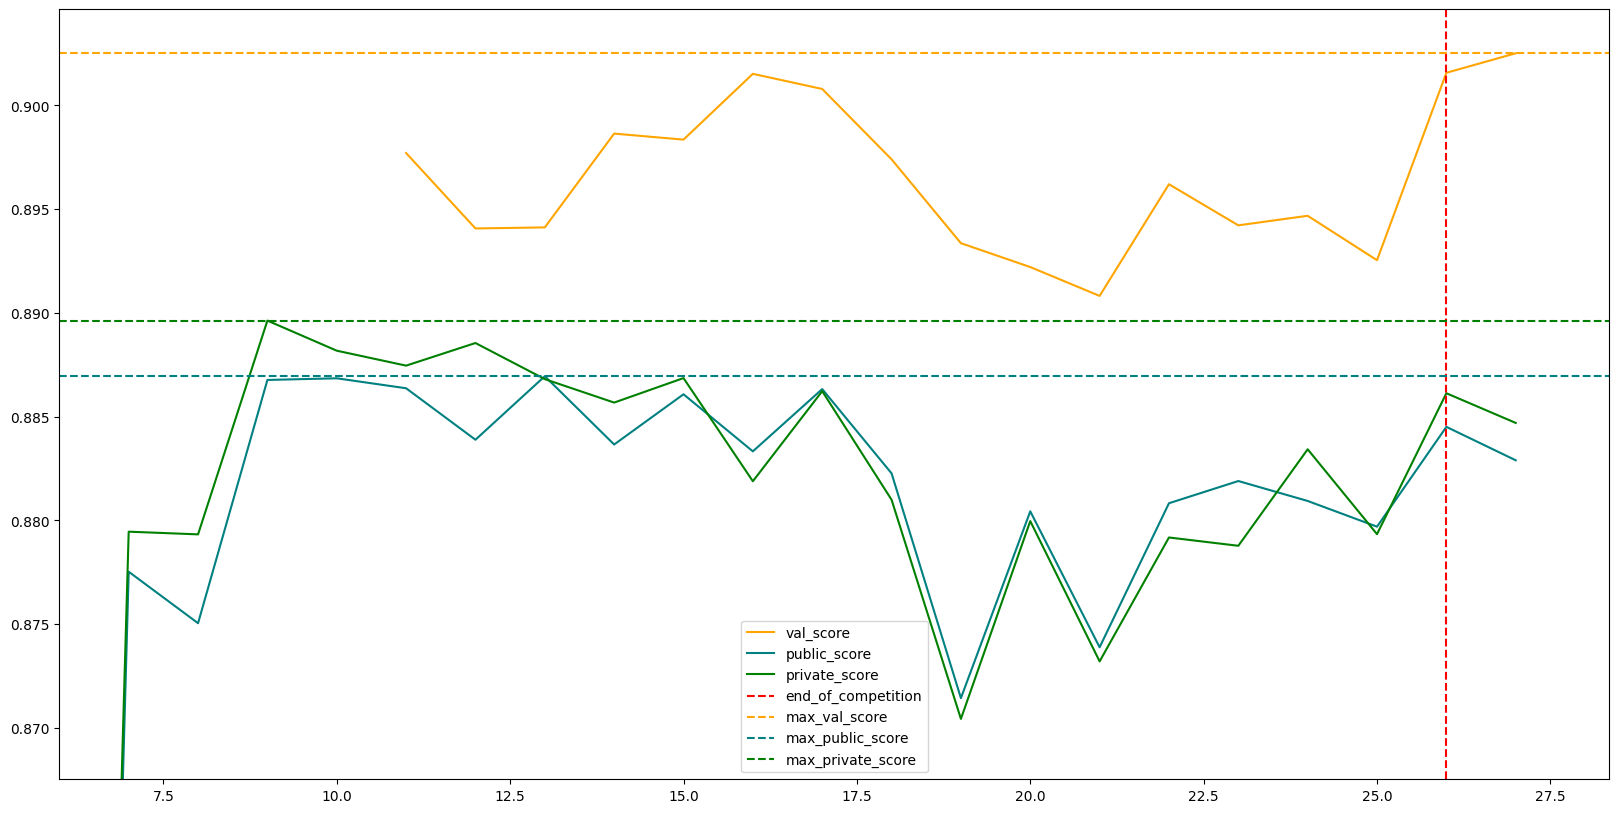

In [61]:
# Plot validation line vs public score line vs private score line

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(history["order"], history["validation"], label="val_score", color="orange")
ax.plot(history["order"], history["public_score"], label="public_score", color="teal")
ax.plot(history["order"], history["private_score"], label="private_score", color="green")

# Add vertical line at (- history.index + 2)

ax.axvline(history.shape[0] - 2, color="red", linestyle="--", label="end_of_competition")

# Add horizontal lines at max values

ax.axhline(history["validation"].max(), color="orange", linestyle="--", label="max_val_score")
ax.axhline(history["public_score"].max(), color="teal", linestyle="--", label="max_public_score")
ax.axhline(history["private_score"].max(), color="green", linestyle="--", label="max_private_score")

ax.set_xlim(6, ax.get_xlim()[1])
ax.set_ylim(history.loc[history["order"] == 7, "public_score"].values[0] - 0.01, max(history["public_score"].max() + 0.01, history["private_score"].max() + 0.015))

ax.legend()